In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# import the two classes containing the algorithms
import scaling
import inference

In [2]:
# read in data
data = np.loadtxt('gifgif_raw.txt',delimiter = ',')
data = data.astype(int)

In [3]:
data

array([[3626, 5562],
       [5210, 3780],
       [2306, 5081],
       ...,
       [4316, 3267],
       [5305,  320],
       [ 202, 5339]])

In [4]:
np.min(data)

-1

In [5]:
# for memory reasons, may need to truncate data
matrix = data[:20000,:]

# select largest strongly connected component
import networkx as nx
G = nx.DiGraph()

# pairwise comparison to build edges
rankings = list(map(tuple, matrix))
G.add_edges_from(rankings)

# largest strongly connected component
G = max(nx.strongly_connected_component_subgraphs(G), key=len)

# relabel and get updated rankings
G = nx.convert_node_labels_to_integers(G)
rankings = list(G.edges())

# return reduced Adjacency matrix
Adjacency = nx.adjacency_matrix(G).toarray()

In [6]:
Adjacency

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int32)

In [7]:
# information from adjacency matrix
num_rankings = np.sum(Adjacency)
p = np.sum(Adjacency,1)/num_rankings
nb_items = Adjacency.shape[0]

In [8]:
# build the matrix used in matrix scaling algorithm
A = np.zeros((num_rankings,nb_items))
index = 0
for i in range(nb_items):
    length = np.sum(Adjacency[i,:])
    pair = np.where(Adjacency[i,:]==1)[0]
    A[index:index+length,i] = 1
    A[np.arange(index,index+length),pair] = 1
    index += length

In [9]:
print('number of items is: ',nb_items)
print('number of comparisons is: ',num_rankings)

number of items is:  2503
number of comparisons is:  6876


In [10]:
rankings

[(0, 822),
 (0, 795),
 (1, 2398),
 (1, 665),
 (1, 87),
 (1, 47),
 (2, 2362),
 (2, 1735),
 (2, 309),
 (3, 388),
 (3, 566),
 (4, 242),
 (4, 816),
 (5, 1089),
 (6, 2447),
 (7, 18),
 (8, 2084),
 (8, 2402),
 (8, 487),
 (9, 1606),
 (9, 847),
 (9, 2307),
 (9, 755),
 (9, 1715),
 (9, 223),
 (9, 853),
 (9, 925),
 (9, 2437),
 (9, 1301),
 (9, 1773),
 (10, 608),
 (10, 2112),
 (10, 1459),
 (10, 464),
 (10, 2288),
 (10, 1757),
 (10, 2380),
 (10, 388),
 (11, 1469),
 (11, 2246),
 (11, 1635),
 (11, 224),
 (11, 1419),
 (11, 375),
 (11, 2062),
 (11, 1314),
 (11, 2206),
 (12, 265),
 (12, 2394),
 (13, 779),
 (13, 962),
 (13, 2360),
 (13, 1547),
 (14, 1416),
 (14, 1132),
 (14, 1079),
 (15, 1640),
 (15, 2085),
 (16, 2330),
 (16, 2092),
 (17, 945),
 (18, 2389),
 (18, 1431),
 (18, 919),
 (19, 2313),
 (20, 1181),
 (21, 1293),
 (21, 362),
 (21, 964),
 (22, 1422),
 (22, 2196),
 (23, 2428),
 (23, 46),
 (23, 920),
 (23, 1527),
 (23, 439),
 (24, 2403),
 (25, 1798),
 (25, 1447),
 (25, 2459),
 (26, 1293),
 (27, 1235),


In [11]:
# MLE with scaling algorithm
start = time.time()
scaling_strength, scaled_A, iterations,_ = scaling.iterative_scaling(A,p)
end = time.time()
print('Scaling algorithm converged in ',iterations, 'iterations and took ',end-start,'seconds.')

# MLE with iterative LSR algorithm
start = time.time()
ilsr_strength, iterations,_ = inference.ilsr(nb_items,rankings)
end = time.time()
print('Iterative LSR algorithm converged in ',iterations, 'iterations and took ',end-start,'seconds.')

Scaling algorithm converged in  1656 iterations and took  30.3889479637146 seconds.
Iterative LSR algorithm converged in  315 iterations and took  124.92526459693909 seconds.


In [18]:
MLE = (scaling_strength+ilsr_strength)/2

In [19]:
_, _, _, scaling_errors = scaling.iterative_scaling(A,p,ground_truth=MLE)
_, _, ilsr_errors = inference.ilsr(nb_items,rankings,ground_truth=MLE)

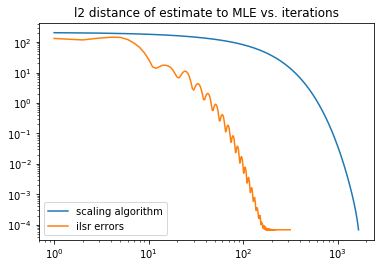

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
#plt.scatter(np.arange(1656),np.log(scaling_errors),label='scaling algorithm')
#plt.scatter(np.arange(315),np.log(ilsr_errors),label='ilsr errors')
plt.loglog(np.arange(1656),scaling_errors,label='scaling algorithm')
plt.loglog(np.arange(315),ilsr_errors,label='ilsr errors')
plt.title('l2 distance of estimate to MLE vs. iterations, loglog')
plt.legend()
plt.show()

In [ ]:
np.sum(scaled_A,axis=1)

In [ ]:
scaling_strength/scaling_strength.sum()

In [ ]:
ilsr_strength/ilsr_strength.sum()

In [ ]:
max(abs(scaling_strength/scaling_strength.sum() - ilsr_strength/ilsr_strength.sum()))

In [ ]:
len(rankings)

In [ ]:
np.sum(ilsr_strength)

In [ ]:
np.sum(scaling_strength)